In [1]:
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import module_weather
import module_initsize
import module_covidstats
import module_riskfactor
import viability
import math
import settle
from numpy import savetxt

In [2]:
# Plot 1: Number concentration
NaCl_con = 80.0/1000; # 80.0 mmol/L converted to mol/L for saliva, from Kallapur et al.
sizeclass = [3,6,12,20,28,36,45,62.5,87.5,112.5,137.5,175,225,375,750] # in um
numcon = [4.59,66.21,22.23,11.33,7.87,4.32,3.37,4.57,3.44,4.52,4.31,4.52,3.85,3.45,1.11] # in cm^-3
#sizeclass = [12,20,28,36,45,62.5,87.5,112.5,137.5,175,225,375,750,1500] # in um
#numcon = [22.23,11.33,7.87,4.32,3.37,4.57,3.44,4.52,4.31,4.52,3.85,3.45,1.11,0.00] # in cm^-3
t_settle = []
for binnum in range(15):
    size = sizeclass[binnum]
    count = numcon[binnum]
    #settling_time = settle.settling_time(T,RH,size,NaCl_con,1.5,model='sc')
logsize = np.log10(sizeclass)
plt.scatter(logsize, numcon, color=c, s=5)
plt.xlabel("log10 initial size in um")
plt.ylabel("number concentration in cm^-3")
savetxt('sizedist.csv', [logsize,numcon], delimiter=',') # equilibrium diameter in um

NameError: name 'T' is not defined

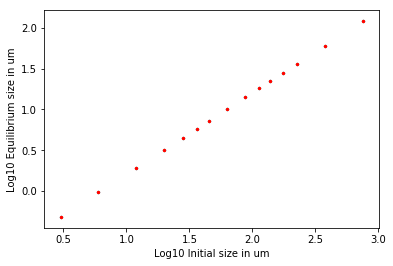

In [3]:
# Plot 2: T on equilibrium size

NaCl_con = 80.0/1000; # 80.0 mmol/L converted to mol/L for saliva, from Kallapur et al.
sizeclass = [3,6,12,20,28,36,45,62.5,87.5,112.5,137.5,175,225,375,750] # in um
numcon = [4.59,66.21,22.23,11.33,7.87,4.32,3.37,4.57,3.44,4.52,4.31,4.52,3.85,3.45,1.11] # in cm^-3
#sizeclass = [12,20,28,36,45,62.5,87.5,112.5,137.5,175,225,375,750,1500] # in um
#numcon = [22.23,11.33,7.87,4.32,3.37,4.57,3.44,4.52,4.31,4.52,3.85,3.45,1.11,0.00] # in cm^-3
t_settle = []

T_range = [5.0,10,15,20,25,30,35]
RH_range = [10,20,30,40,50,60,70,80,90,100]

colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(T_range)))
T_sizeeq_output = []

for condT in range(len(T_range)): # Study the effect of varying temperature with fixed RH at 50% 
    T = T_range[condT]
    RH = 50
    
    for binnum in range(15):
        size = sizeclass[binnum]
        r_eq = 10**6 * settle.kohler(T, RH, size, NaCl_con)
        c = colors[condT]
        plt.scatter(np.log10(size), np.log10(2*r_eq), color=c, s=5, label=str(T))
        T_sizeeq_output.append([T,RH,size,2*r_eq])
        
plt.xlabel("Log10 Initial size in um")
plt.ylabel("Log10 Equilibrium size in um")
savetxt('T_eqsize.csv', T_sizeeq_output, delimiter=',') # equilibrium diameter in um


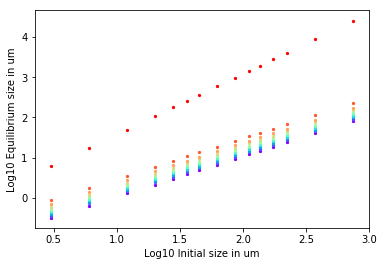

In [4]:
# Plot 3: RH on equilibrium size
colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(RH_range)))
RH_sizeeq_output = []

for condRH in range(len(RH_range)): # Study the effect of varying RH with fixed T at 25 C
    T = 25
    RH = RH_range[condRH]
    c = colors[condRH]
    for binnum in range(15):
        size = sizeclass[binnum]
        r_eq = 10**6 * settle.kohler(T, RH, size, NaCl_con)
        c = colors[condRH]
        plt.scatter(np.log10(size), np.log10(2*r_eq), color=c, s=5, label=str(RH))
        RH_sizeeq_output.append([T,RH,size,2*r_eq])

plt.xlabel("Log10 Initial size in um")
plt.ylabel("Log10 Equilibrium size in um")
savetxt('RH_eqsize.csv', RH_sizeeq_output, delimiter=',') # equilibrium diameter in um

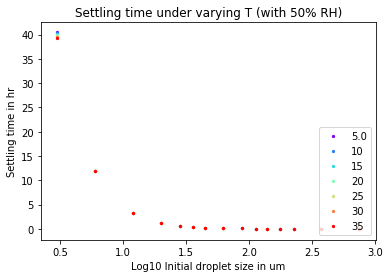

In [5]:
#Plot 4: T on Settling time
mode_to_test = 'speaking' # enter 'speaking','coughing', or 'breathing'

T_range = [5.0,10,15,20,25,30,35]
RH_range = [10,20,30,40,50,60,70,80,90,100]

colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(T_range)))

for condT in range(len(T_range)): # Study the effect of varying temperature with fixed RH at 50% 
    T = T_range[condT]
    RH = 50
    if mode_to_test == 'speaking':
        [sizeclass,numcon,t_settle,sizepeak,t_peak] = module_initsize.speaking(T,RH)
    elif mode_to_test == 'coughing':
        [sizeclass,numcon,t_settle,sizepeak,t_peak] = module_initsize.coughing(T,RH)
    elif mode_to_test == 'breathing':
        [sizeclass,numcon,t_settle,sizepeak,t_peak] = module_initsize.breathing(T,RH)
    c = colors[condT]
    plt.scatter(np.log10(sizeclass), t_settle, color=c, s=5, label=str(T))
#label_list = [str(x) for x in T_range]
plt.title("Settling time under varying T (with 50% RH)")
plt.xlabel('Log10 Initial droplet size in um')
plt.ylabel('Settling time in hr')

#plt.legend(label_list)
plt.legend(loc="lower right")
plt.show()

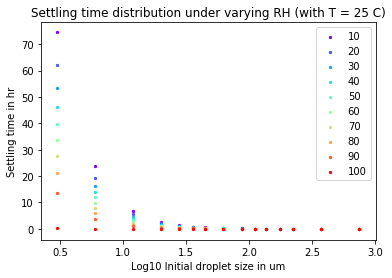

In [6]:
#Plot 5: RH on Settling time
colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(RH_range)))

for condRH in range(len(RH_range)): # Study the effect of varying RH with fixed T at 25 C
    T = 25
    RH = RH_range[condRH]
    if mode_to_test == 'speaking':
        [sizeclass,numcon,t_settle,sizepeak,t_peak] = module_initsize.speaking(T,RH)
    elif mode_to_test == 'coughing':
        [sizeclass,numcon,t_settle,sizepeak,t_peak] = module_initsize.coughing(T,RH)
    elif mode_to_test == 'breathing':
        [sizeclass,numcon,t_settle,sizepeak,t_peak] = module_initsize.breathing(T,RH)
    c = colors[condRH]
    plt.scatter(np.log10(sizeclass), t_settle,  color=c, s=5, label=str(RH))

    
plt.title("Settling time distribution under varying RH (with T = 25 C)")
plt.xlabel('Log10 Initial droplet size in um')
plt.ylabel('Settling time in hr')
#plt.legend(label_list)
plt.legend(loc="upper right")
plt.show()


In [7]:
# Plot 6: T and RH on settling time

TRH_settle_contour = []

for condRH in range(len(RH_range)):
    RH = RH_range[condRH]
    for condT in range(len(T_range)):
        T = T_range[condT]
        [sizeclass,numcon,t_settle,sizepeak,t_peak] = module_initsize.speaking(T,RH)
        TRH_settle_contour.append([T,RH,t_peak])
savetxt('TRH_settlingtime_contour.csv', TRH_settle_contour, delimiter=',')
        

In [8]:
# Plot 7: T and RH on half-life
TRH_viab_hl = []
for condRH in range(len(RH_range)):
    RH = RH_range[condRH]
    for condT in range(len(T_range)):
        T = T_range[condT]
        decay_rate = viability.kdecay(T,RH,0)
        halflife = math.log(2)/decay_rate
        TRH_viab_hl.append([T,RH,halflife])
savetxt('TRH_viability_contour.csv', TRH_viab_hl, delimiter=',')
    

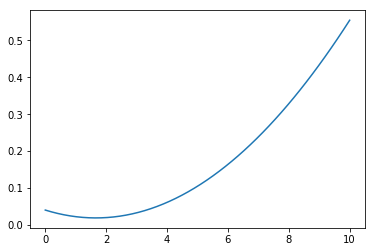

In [9]:
dspan = np.linspace(0,10)
plt.plot(dspan, 0.0077*dspan**2 - 0.0256 * dspan + 0.0405)